<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Modelo

# Aquisição dos Dados


In [1]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://raw.githubusercontent.com/joaonart/mcz-pl-a1-modelo-ja/master/database/texto.txt'): 
    texto.append(line.decode('utf-8'))

#for line in urllib.request.urlopen('https://raw.githubusercontent.com/joaonart/mcz-pl-a1-modelo-ja/master/database/345.txt'): 
#    texto.append(line.decode('utf-8'))

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "


# Construção do Dicionário

In [2]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)  

{'quais': 4, 'janelas': 5, 'foram': 1, 'fechadas': 1, 'e': 55, 'estão': 16, 'abertas': 2, 'ou': 10, 'podemos': 8, 'abrir': 2, 'isolamento': 2, 'social': 2, 'é': 10, 'necessário!': 1, 'por': 6, 'isso': 13, 'estamos': 19, 'impedidos': 1, 'de': 60, 'circular': 2, 'aglomerar': 1, 'abraçar': 1, 'beijar': 1, 'pegar': 1, 'no': 15, 'colo': 2, 'visitar': 1, 'encontrar': 4, 'pessoalmente': 1, 'etc': 2, 'somos': 4, 'seres': 4, 'contato': 1, 'do': 11, 'convívio': 3, 'pessoal': 1, 'nós': 5, 'humanos': 1, 'grupais!': 1, 'neste': 1, 'momento': 5, 'uma': 5, 'nossas': 6, 'principais': 1, 'características': 1, 'encontra-se': 1, 'suspensa': 1, 'em': 9, 'stand': 1, 'by': 1, 'fazendo-nos': 1, 'repensar': 1, 'quem': 1, 'afinal': 3, 'o': 19, 'que': 63, 'está': 10, 'acontecendo': 4, 'para': 19, 'onde': 3, 'tudo': 5, 'nos': 15, 'levará': 1, 'quanto': 2, 'tempo': 9, 'irá': 1, 'durar': 1, 'tantas': 1, 'outras': 3, 'perguntas': 2, 'já': 5, 'sabemos': 2, 'ninguém': 1, 'imune': 1, 'ao': 4, 'coronavírus': 1, 'mas': 

# Exibição dos Resultados

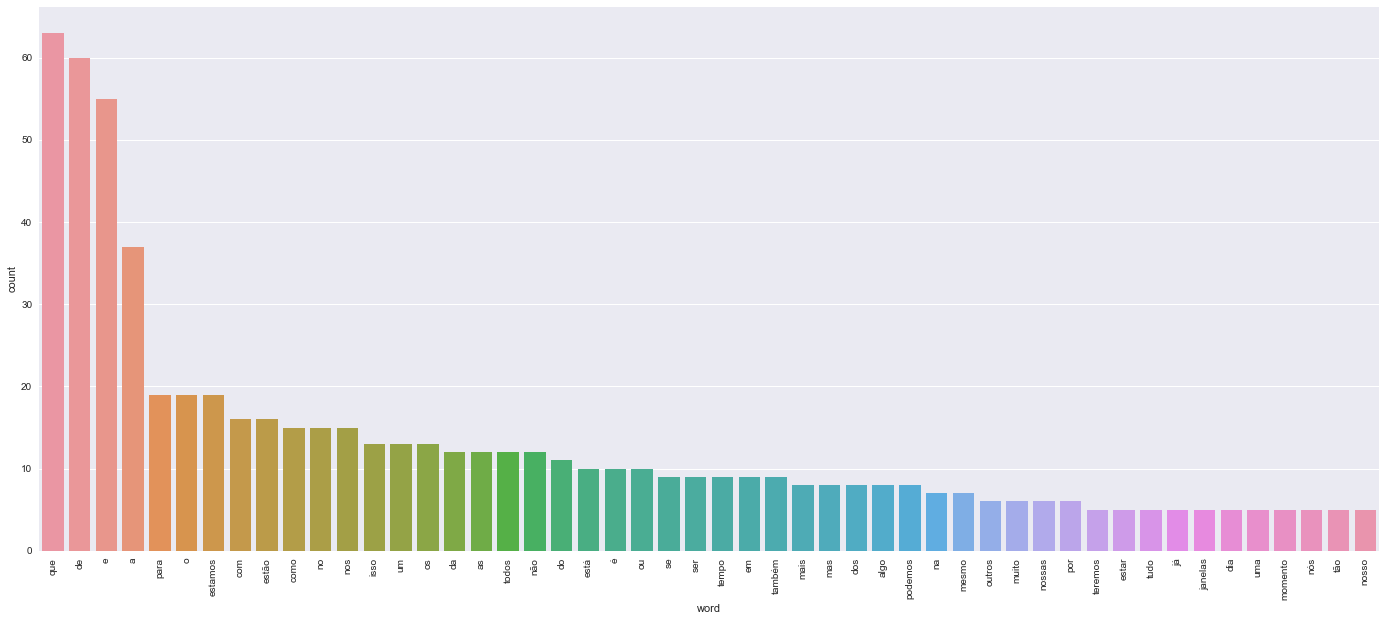

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
#df = df.iloc[ int(len(df)/2) - 10 : int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()